In [18]:
import numpy as np 
im# Import libraries
port pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import mysql.connector
import sqlalchemy

## Load data

In [19]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="ozge.12",
  database="starbucks_db"
)

print(mydb)

In [3]:
customer_behavior_clusters = pd.read_sql('SELECT * FROM customer_behavior_clusters_', mydb)
customer_behavior_with_num_received = pd.read_sql('SELECT * FROM customer_behavior_with_num_received_', mydb)
customers = pd.read_sql('SELECT * FROM customers', mydb)
offers = pd.read_sql('SELECT * FROM offers', mydb)

C:\Users\16474\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\16474\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\16474\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [20]:
customer_behavior_with_num_received.head()

,person,num_received,num_viewed,num_completed,num_transactions,money_spent
0,0009655768c64bdeb2e877511632db8f,5,4,3,8,18.418.5728.1614.1112.3622.1613.5610.27
1,00116118485d4dfda04fdbaba9a87b5c,2,2,0,3,0.70000000000000010.23.19
2,0011e0d4e6b944f998e987f904e8c1e5,5,5,3,5,11.938.9623.0313.4922.05
3,0020c2b971eb4e9188eac86d93036a77,5,3,3,8,24.3932.027.9424.3117.2433.8617.6319.49
4,0020ccbbb6d84e358d3414a3ff76cffd,4,4,3,12,14.2720.0811.6510.7613.8614.5310.326.810000000...


In [ ]:
customer_behavior_clusters.drop('index', axis = 1, inplace = True)

In [ ]:
customer_behavior_with_num_received.drop('index', axis = 1, inplace = True)

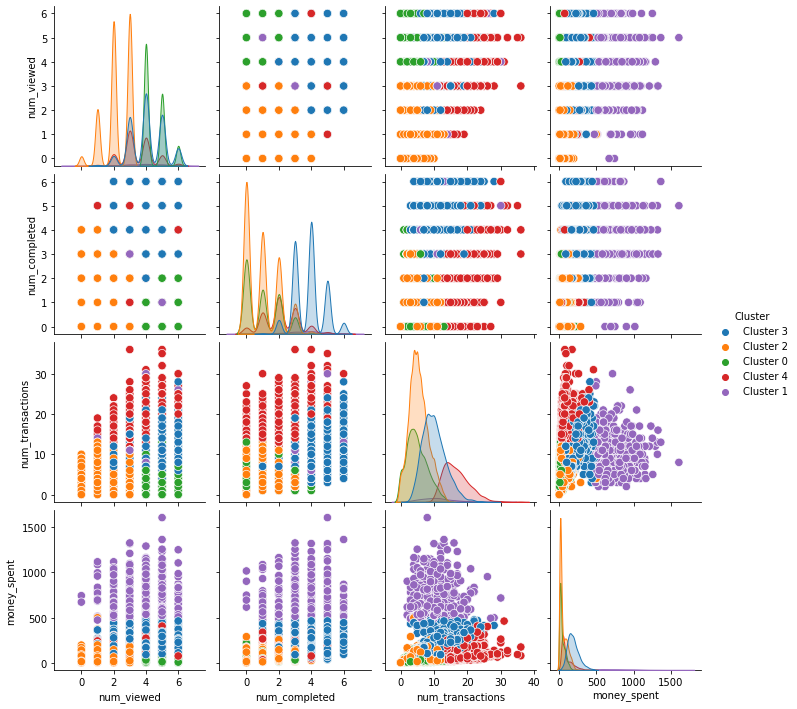

In [7]:
sns.pairplot(customer_behavior_clusters, hue = 'Cluster', 
             plot_kws = dict(marker="o", s=70),); plt.show()

In [22]:
temp = pd.merge(customer_behavior_clusters, customer_behavior_with_num_received['num_received'], left_index = True, right_index = True)


In [23]:
cluster_means = temp.groupby('Cluster').mean().round(3)
cluster_means

,num_viewed,num_completed,num_transactions,money_spent,num_received
Cluster,,,,,
Cluster 0,4.523,0.996,4.869,38.436,4.988
Cluster 1,3.815,3.469,10.808,773.432,4.692
Cluster 2,2.210,0.980,5.400,50.516,3.853
Cluster 3,4.080,3.835,10.005,186.461,4.898
Cluster 4,3.473,2.137,16.604,96.268,4.591


In [169]:
cluster_summary = pd.DataFrame(columns = ['frequency', 'avg_purchase_value', 'offer_complete_rate'])

In [170]:
# Add values to df `cluster_summary`
cluster_summary['frequency'] = cluster_means['num_transactions'].round(1)
cluster_summary['avg_purchase_value'] = (cluster_means['money_spent'] / cluster_means['num_transactions']).round(1)
cluster_summary['offer_complete_rate'] = (cluster_means['num_completed'] / cluster_means['num_received']).round(2)

In [171]:
cluster_summary

,frequency,avg_purchase_value,offer_complete_rate
Cluster,,,
Cluster 0,4.9,7.9,0.20
Cluster 1,10.8,71.6,0.74
Cluster 2,5.4,9.4,0.25
Cluster 3,10.0,18.6,0.78
Cluster 4,16.6,5.8,0.47


* Frequency - Number of transactions made during the month of campaign
* Average Purchase Value - Average number of dollars spent on each transaction
* Offer Complete Rate - Offer overall completion rate


Cluster 0

These customers has low engagement. They have low average value and low offer complete rate. 
Also frequency (viewed offer) is low

Cluster 1

These customers completed and viewed high number of offers. they have also the maximum number of average.
they have a high number of offer complated rate

Cluster 2

They have more frequency value than offer completed rate. They completed less offer than viewed.
The average purchase value is not too much low.

Cluster 3

they have high frequency, high offer completed rate and high average purchase values.
this group can be asses as regular customers. they followed the offers.

Cluster 4

They have lowest purchase value and low offers completed rate. But, they have high frequency. they can be regular customers with small amount of payments. also, they don't follow the offers too much


In [172]:
customer_behavior_profile = pd.merge(customer_behavior_clusters, customers,
                                    left_on = 'person', right_on = 'id').drop(['id'], axis = 1)

In [173]:
customer_behavior_profile.head()

,num_viewed,num_completed,num_transactions,money_spent,Cluster,person,index,gender,age,became_member_on,income
0,4,3,8,127.60,Cluster 3,0009655768c64bdeb2e877511632db8f,3279,M,33,2017-04-21,72000.0
1,5,3,5,79.46,Cluster 0,0011e0d4e6b944f998e987f904e8c1e5,3639,O,40,2018-01-09,57000.0
2,3,3,8,196.86,Cluster 3,0020c2b971eb4e9188eac86d93036a77,2220,F,59,2016-03-04,90000.0
3,4,3,12,154.05,Cluster 3,0020ccbbb6d84e358d3414a3ff76cffd,7347,F,24,2016-11-11,60000.0
4,4,3,18,48.34,Cluster 4,003d66b6608740288d6cc97a6903f4f0,8827,F,26,2017-06-21,73000.0


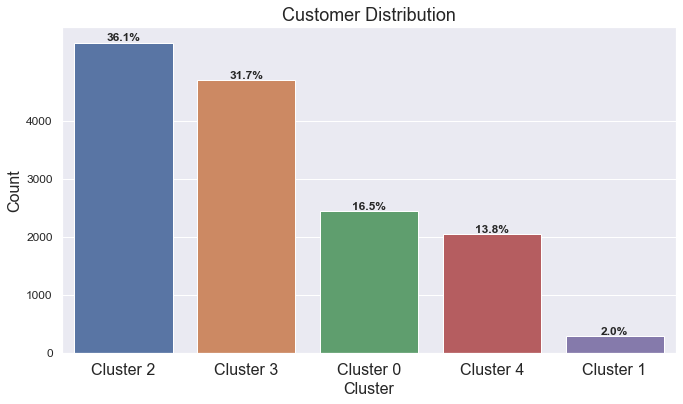

In [174]:
p = customer_behavior_profile.value_counts('Cluster')
cluster_pct = list((p/p.sum() * 100).round(2))
fig = plt.figure(figsize = (11,6))
ax = sns.barplot(x = p.index.values, y = p.values)
patches = ax.patches
for i in range(len(p)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 25
    ax.annotate(text = '{:.1f}%'.format(cluster_pct[i]), xy = (x, y), ha = 'center',
               fontsize = 12, weight = 'bold')
    
plt.title('Customer Distribution', fontsize = 18)
plt.xticks(ticks = np.arange(len(p)), fontsize = 16)
plt.yticks(ticks = np.arange(0, 5000, 1000), fontsize = 12)
plt.xlabel('Cluster', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

number are customers are consisted Cluster 2 has a maximum number of Customers. this group view more offer than completed and has low average purchase. Cluster 3 has near value to Cluster 2. this means most of them of customers are regular customers and offer viewers.  

In [42]:
segment_means = customer_behavior_profile.groupby('Cluster').agg({'age': 'mean', 'income': 'mean'})
segment_means.round(2).head()

,age,income
Cluster,,
Cluster 0,55.43,65395.50
Cluster 1,56.50,75085.62
Cluster 2,53.75,63948.00
Cluster 3,57.29,73318.64
Cluster 4,47.90,49689.79


CLUSTER 3 are highest in both age and income. CLUSTER 1 comes right after.
CLUSTER 4 are the lowest in both age and income

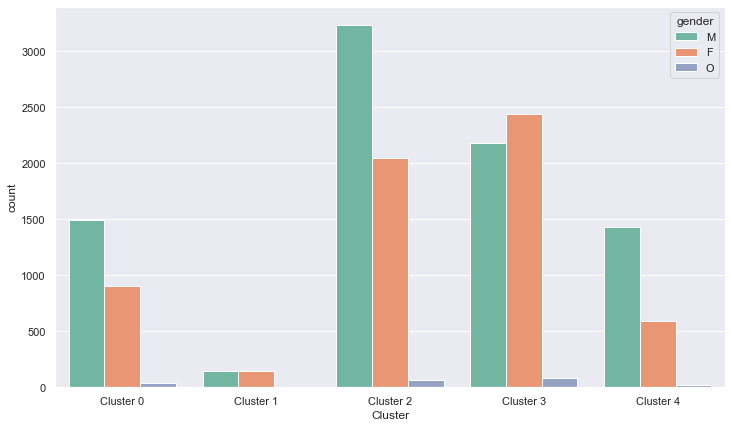

In [130]:
fig = plt.figure(figsize = (12,7))
ax = sns.countplot(data = customer_behavior_profile, x='Cluster', 
                   hue ='gender', order=['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'],
                  hue_order=['M','F','O'], palette = "Set2")
plt.show()